In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'C:\Ach 6'
df = pd.read_csv(os.path.join(path,'Data', 'Original', 'boatdata.csv'), index_col = False)

In [3]:
df.head()

,Price,$ per sqr meter,Boat Type,Manufacturer,Type,Year Built,Length,Width,Meter Squared,Material,Location,Number of views last 7 days,Latitude,Longitude
0,3430.70,654.738730,Sport Boat,Marine power boats,new boat from stock,2007,3.69,1.42,5.2398,Aluminium,Switzerland Ã‚Â» Lake of Zurich Ã‚Â» StÃƒÂ¤fa ZH,124,47.222522,8.752711
1,3331.02,642.681845,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,5.1830,Aluminium,Germany Ã‚Â» Bayern Ã‚Â» MÃƒÂ¼nchen,58,51.165691,10.451526
2,3321.50,528.329198,Sport Boat,Linder power boats,new boat from stock,2007,4.03,1.56,6.2868,Aluminium,Switzerland Ã‚Â» Lake Constance Ã‚Â» Uttwil,132,47.583499,9.340498
3,3166.80,543.815362,Fishing Boat,Marine power boats,new boat from stock,2007,4.13,1.41,5.8233,Aluminium,Switzerland Ã‚Â» Lake of Zurich Ã‚Â» StÃƒÂ¤fa ...,145,47.222522,8.752711
4,4186.00,576.584022,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,7.2600,Aluminium,Switzerland Ã‚Â» Zugersee Ã‚Â» Neuheim,113,47.204778,8.575354


C:\Users\odarc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='$ per sqr meter', ylabel='Density'>

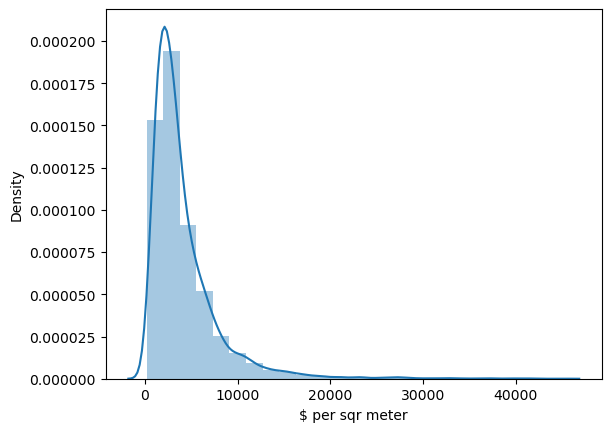

In [16]:
sns.distplot(df['$ per sqr meter'], bins=25)

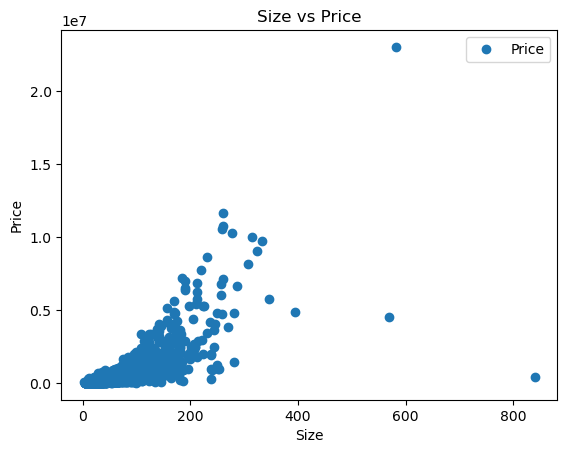

In [18]:
df.plot(x = 'Meter Squared', y='Price',style='o') 
plt.title('Size vs Price')  
plt.xlabel('Size')  
plt.ylabel('Price')  
plt.show()

In [19]:
X = df['Meter Squared'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [20]:
X

array([[ 5.2398],
       [ 5.183 ],
       [ 6.2868],
       ...,
       [11.2   ],
       [15.34  ],
       [12.24  ]])

In [21]:
y

array([[ 3430.7 ],
       [ 3331.02],
       [ 3321.5 ],
       ...,
       [44100.  ],
       [44100.  ],
       [43589.  ]])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
regression = LinearRegression()

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

In [25]:
y_predicted = regression.predict(X_test)

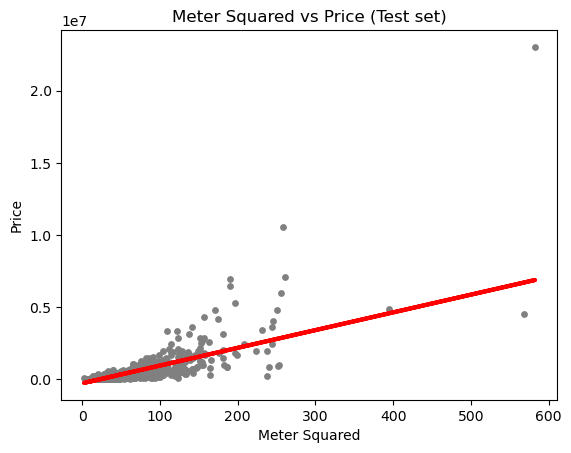

In [26]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Meter Squared vs Price (Test set)')
plot_test.xlabel('Meter Squared')
plot_test.ylabel('Price')
plot_test.show()

In [27]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [28]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12281.71236025]]
Mean squared error:  279954608949.6567
R2 score:  0.5338212900338353


In [29]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,19590.2,-1.432686e+05
1,213640.0,2.648233e+05
2,14514.5,-1.697185e+05
3,488040.0,5.919319e+05
4,42042.0,6.932787e+04
5,34300.0,1.069885e+05
6,191100.0,4.047758e+05
7,33222.0,-7.772844e+04
8,430220.0,5.503583e+05
9,35270.2,-1.116518e+05


In [30]:
y_predicted_train = regression.predict(X_train)

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[12281.71236025]]
Mean squared error:  211088849220.46448
R2 score:  0.4970832784730662


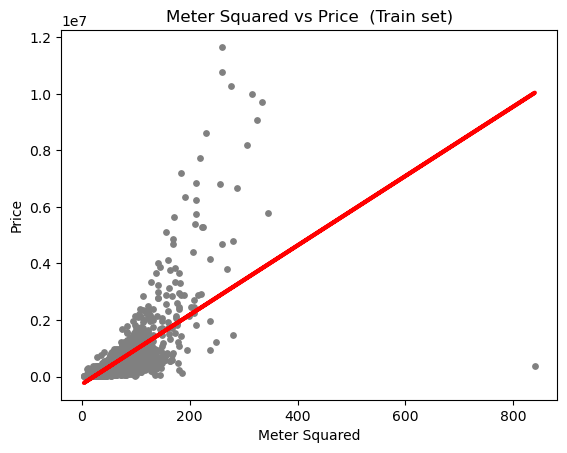

In [34]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='gray', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Meter Squared vs Price  (Train set)')
plot_test.xlabel('Meter Squared')
plot_test.ylabel('Price')
plot_test.show()